In [2]:
import numpy as np
import argparse
from overcooked_ai_py.agents.agent import AgentPair
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.agents.benchmarking import AgentEvaluator

# from human_aware_rl.imitation.behavior_cloning_tf2 import (    _get_base_ae, BehaviorCloningPolicy)
from overcooked_ai_py.mdp.overcooked_env import OvercookedEnv, Overcooked
from overcooked_ai_py.mdp.overcooked_mdp import OvercookedGridworld
from tqdm.auto import trange
import warnings

from agent_policy import dumbAgent

layout_name = "cramped_room"

/media/leonardo/Data/Projects/AAS/project/AAS_project/.venv2/lib/python3.10/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [3]:
import matplotlib.pyplot as plt

In [25]:
base_mdp = OvercookedGridworld.from_layout_name(layout_name)
base_env = OvercookedEnv.from_mdp(base_mdp, info_level=0, horizon=400)
env = Overcooked(base_env=base_env, featurize_fn=base_env.featurize_state_mdp)

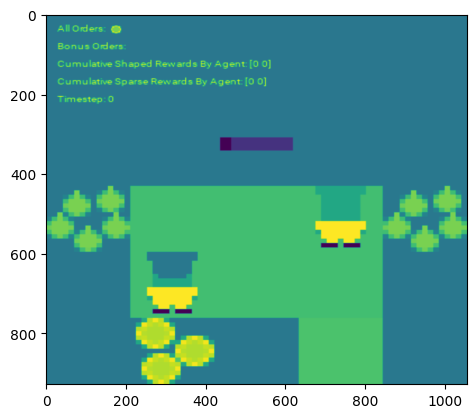

In [5]:
plt.imshow(env.render()[:, :, 1])

In [11]:
obs, reward, terminated, infos = env.step((2, 2))

In [12]:
obs

{'both_agent_obs': (array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -2., -1.,  0.,  0., -1.,
          1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  1.,  0.,  0.,  0., -2.,  2.,  0.,  0.,  0.,  0.,  0.,
          2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
          0.,  1., -1.,  2.,  2.]),
  array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -2.,
          2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0., -2., -1.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  1.,
          1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,

In [7]:
obs.keys()

dict_keys(['both_agent_obs', 'overcooked_state', 'other_agent_env_idx'])

In [24]:
from overcooked_ai_py.mdp.actions import MediumLevelActionManager

ImportError: cannot import name 'MediumLevelActionManager' from 'overcooked_ai_py.mdp.actions' (/media/leonardo/Data/Projects/AAS/project/AAS_project/wheels/overcooked_ai/src/overcooked_ai_py/mdp/actions.py)

In [ ]:
obs["overcooked_state"].players

((2, 2) facing (1, 0) holding None, (3, 1) facing (1, 0) holding None)

In [10]:
result = env.reset()
result.keys()

dict_keys(['both_agent_obs', 'overcooked_state', 'other_agent_env_idx'])

In [13]:
dir(base_env)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_episode_info',
 '_get_discounted_rewards_with_horizon',
 '_mlam',
 '_mp',
 '_prepare_info_dict',
 '_update_game_stats',
 'copy',
 'display_states',
 'env_params',
 'execute_plan',
 'featurize_state_mdp',
 'from_mdp',
 'game_stats',
 'get_agent_infos_for_trajectories',
 'get_discounted_rewards',
 'get_rollouts',
 'horizon',
 'info_level',
 'is_done',
 'lossless_state_encoding_mdp',
 'mdp',
 'mdp_generator_fn',
 'mlam',
 'mlam_params',
 'mp',
 'num_mdp',
 'potential',
 'print_state_transition',
 'proportion_stuck_time',
 'reset',
 'run_agents',
 'start_state_fn',
 'state',
 'step',
 'variable_mdp']

In [18]:
len(obs["both_agent_obs"][1])

96

In [28]:
lossless_state = base_mdp.lossless_state_encoding(obs["overcooked_state"])
lossless_state[0].shape

(5, 4, 26)

In [26]:
dir(env)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_is_protocol',
 '_np_random',
 '_np_random_seed',
 '_setup_observation_space',
 'action_space',
 'agent_idx',
 'base_env',
 'close',
 'env_name',
 'featurize_fn',
 'get_wrapper_attr',
 'has_wrapper_attr',
 'mdp',
 'metadata',
 'np_random',
 'np_random_seed',
 'observation_space',
 'render',
 'render_mode',
 'reset',
 'set_wrapper_attr',
 'spec',
 'step',
 'unwrapped',
 'visualizer']

In [27]:
feature_state = env.featurize_fn(obs["overcooked_state"])
feature_state[0].shape

(96,)

In [37]:
import time

t = time.time()
ckpoint_id = int((t * 10) % 1e6)
lt = time.localtime(t)
print(f"policy_{lt[3]}_{lt[4]}_{lt[5]}_{ckpoint_id}.h5")

policy_1_44_7_254475.h5


In [19]:
infos

{'agent_infos': [{}, {}],
 'sparse_r_by_agent': [0, 0],
 'shaped_r_by_agent': [0, 0],
 'phi_s': None,
 'phi_s_prime': None,
 'policy_agent_idx': 1}